In [1]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
file_path = '/content/drive/MyDrive/patient-clustering-kmeans/data/processed.cleveland.csv'
data = pd.read_csv(file_path)

# Preview
print(data.head())

   63.0  1.0  1.0.1  145.0  233.0  1.0.2  2.0  150.0  0.0  2.3  3.0 0.0.1  \
0  67.0  1.0    4.0  160.0  286.0    0.0  2.0  108.0  1.0  1.5  2.0   3.0   
1  67.0  1.0    4.0  120.0  229.0    0.0  2.0  129.0  1.0  2.6  2.0   2.0   
2  37.0  1.0    3.0  130.0  250.0    0.0  0.0  187.0  0.0  3.5  3.0   0.0   
3  41.0  0.0    2.0  130.0  204.0    0.0  2.0  172.0  0.0  1.4  1.0   0.0   
4  56.0  1.0    2.0  120.0  236.0    0.0  0.0  178.0  0.0  0.8  1.0   0.0   

   6.0  0  
0  3.0  2  
1  7.0  1  
2  3.0  0  
3  3.0  0  
4  3.0  0  


In [5]:
# Try setting header=None and manually renaming columns if needed
data = pd.read_csv(file_path, header=None)

In [6]:
# Preview the first few rows
print(data.head())

     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [8]:
# STEP 4: Clean the data
# Replace '?' with NaN, then drop or impute missing values
data = data.replace('?', np.nan)
data = data.dropna()  # or you could use fillna() with a value or strategy

In [9]:
# Convert all columns to numeric
data = data.apply(pd.to_numeric)

In [10]:
# OPTIONAL: Drop 'target' or ID columns if they exist
if 'target' in data.columns:
    data = data.drop('target', axis=1)
if 'id' in data.columns:
    data = data.drop('id', axis=1)

In [11]:
# STEP 5: Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [12]:
# STEP 6: Apply K-Means clustering
k = 3  # You can change this or use elbow method later
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame
data['cluster'] = kmeans.labels_
print(data['cluster'].value_counts())

cluster
2    136
1    100
0     61
Name: count, dtype: int64


In [13]:
# Group by cluster and compute the mean of each feature
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)

                 0         1         2           3           4         5  \
cluster                                                                    
0        53.540984  0.918033  2.081967  137.409836  229.360656  0.278689   
1        57.820000  0.830000  3.850000  135.100000  252.120000  0.180000   
2        52.580882  0.455882  3.132353  126.625000  251.911765  0.058824   

                6           7         8         9        10        11  \
cluster                                                                 
0        1.311475  160.000000  0.131148  1.114754  1.770492  0.295082   
1        1.210000  130.710000  0.690000  1.926000  1.980000  1.340000   
2        0.698529  158.823529  0.147059  0.388971  1.250000  0.360294   

               12        13  
cluster                      
0        4.573770  0.327869  
1        6.280000  2.310000  
2        3.661765  0.220588  


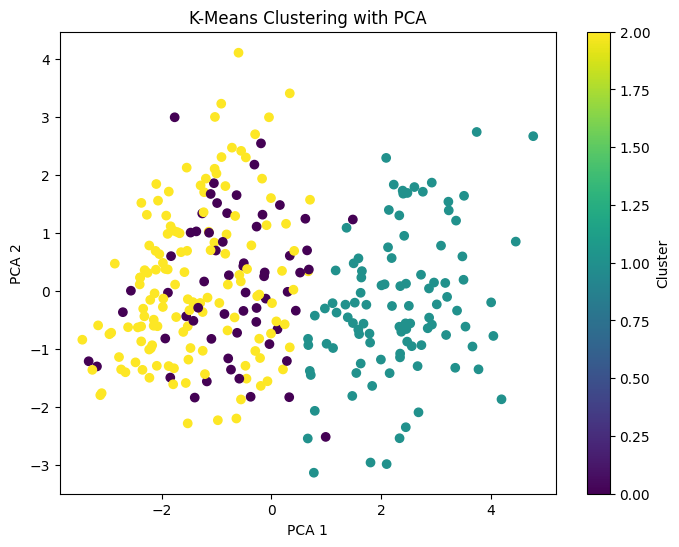

In [14]:
# STEP 7 (Optional): Visualize with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=data['cluster'], cmap='viridis')
plt.title('K-Means Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.show()

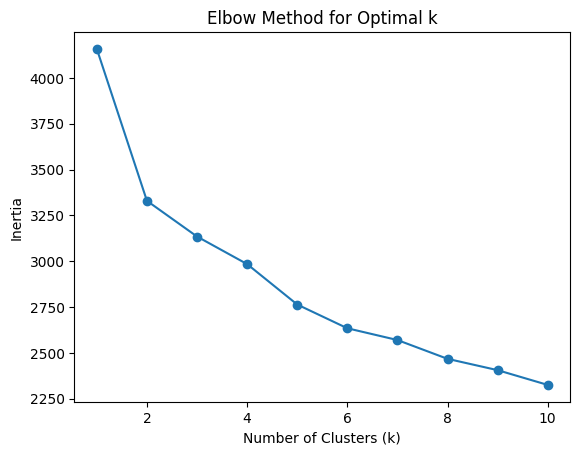

In [15]:
# STEP 8 (Optional): Use Elbow Method to find best k
inertia = []
k_range = range(1, 11)

for i in k_range:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()